In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/'+'xsec_MCC8_to_9/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots_simple/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')
FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_crosscheck.ipynb

In [3]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"MCC8_to_9.root","RECREATE");

In [4]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [5]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)


In [6]:
def my_chi2(h_data1, h_data2, h_covar):
    data1_vec = FF.plot2arr(h_data1,1)
    data2_vec = FF.plot2arr(h_data2,1)
    covar = FF.plot2arr(h_covar,2)    
    inv_covar = np.linalg.inv(covar)
    chi_vec = 0
    for i in range(42):
        for j in range(42):
            chi2_tmp = (data1_vec[i]-data2_vec[i])*inv_covar[i][j]*(data1_vec[j]-data2_vec[j])
            chi_vec +=chi2_tmp
    return chi_vec


In [7]:
def chi2_minus1(h_data1, h_data2, h_covar):
    data_vec = FF.plot2arr(h_data1,1)
    pred_vec = FF.plot2arr(h_data2,1)
    covar_h = FF.plot2arr(h_covar,2)
    
    covar = np.zeros((42,41,41))
    dat_pred = np.zeros((42,41))
    for z in range(42):
        i_c = 0
        for i in range(42):
            j_c = 0
            if i != z :
                dat_pred[z][i_c] = data_vec[i]-pred_vec[i]
                for j in range(42):
                    if j!=z:
                        #print i_c,j_c
                        covar[z][i_c][j_c] = covar_h[i][j]
                        j_c+=1
                i_c+=1
    #inv_covar = np.linalg.inv(covar)
    chi_vec = np.zeros((42))
    for z in range(42):
        inv_covar = np.linalg.inv(covar[z])
        chi_vec[z] = (dat_pred[z]).dot(inv_covar.dot(dat_pred[z]))

    return chi_vec

In [21]:
#load mcc8 result from nuisance or so...
f_mcc8 = ROOT.TFile.Open('/home/tmettler/Share/'+'microboone_numu_cc_inclusive.root', 'read')

h_data_mcc8 = f_mcc8.Get('xsec_data')
h_smearing_mcc8 = f_mcc8.Get('smearing_matrix')
h_covariance_mcc8 = f_mcc8.Get('covariance_matrix')


f_mcc9 = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_filesV4/'\
                         +'xsec_2D_Run3_wighted_MCC8comp.root', 'read')

h_data_mcc9 = f_mcc9.Get('xsec_data')

n_bins = h_data_mcc8.GetNbinsX()

h_corr = h_covariance_mcc8.Clone()
for i in range(n_bins):
    for j in range(n_bins):
        #print h_covariance_mcc8.GetBinContent(i+1,i+1),h_data_mcc9.GetBinError(i+1)
        h_corr.SetBinContent(i+1,j+1, h_covariance_mcc8.GetBinContent(i+1,j+1)/math.sqrt(h_covariance_mcc8.GetBinContent(i+1,i+1)*h_covariance_mcc8.GetBinContent(j+1,j+1)))


In [22]:
h_covariance_tot = h_covariance_mcc8.Clone()
for i in range(n_bins):
    #print h_covariance_mcc8.GetBinContent(i+1,i+1),h_data_mcc9.GetBinError(i+1)
    h_covariance_tot.SetBinContent(i+1,i+1, h_covariance_mcc8.GetBinContent(i+1,i+1)+math.pow(h_data_mcc9.GetBinError(i+1),2))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/png/smearing_matrix_MCC8.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/root/smearing_matrix_MCC8.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/pdf/smearing_matrix_MCC8.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/png/correlation_matrix_MCC8.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/root/correlation_matrix_MCC8.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/pdf/correlation_matrix_MCC8.pdf has been created
Info in <TCanvas:

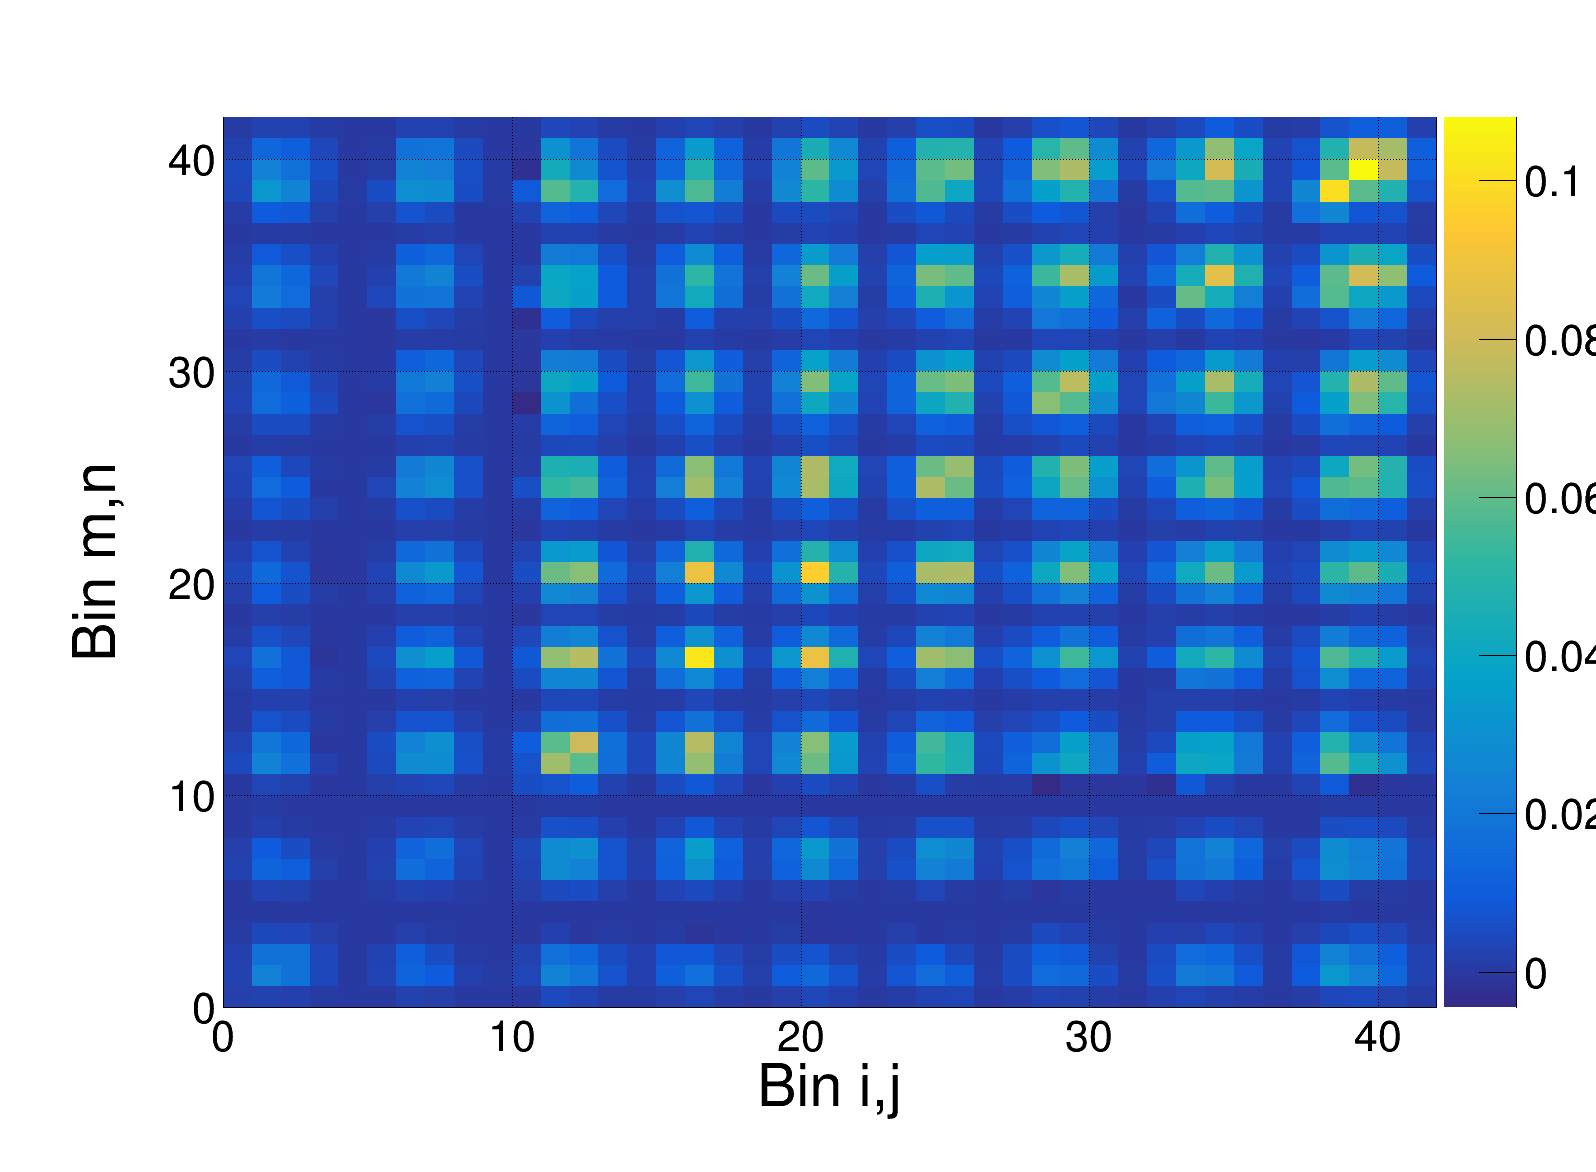

In [23]:
h_smearing_mcc8.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "smearing_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "smearing_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "smearing_matrix_MCC8.pdf")

h_corr.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "correlation_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "correlation_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "correlation_matrix_MCC8.pdf")

h_covariance_mcc8.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + "covariance_matrix_MCC8.png")
c1.SaveAs(outputdir_root + "covariance_matrix_MCC8.root")
c1.SaveAs(outputdir_pdf + "covariance_matrix_MCC8.pdf")

134.8902764640338


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/png/h_chiM1.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/root/h_chiM1.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/pdf/h_chiM1.pdf has been created


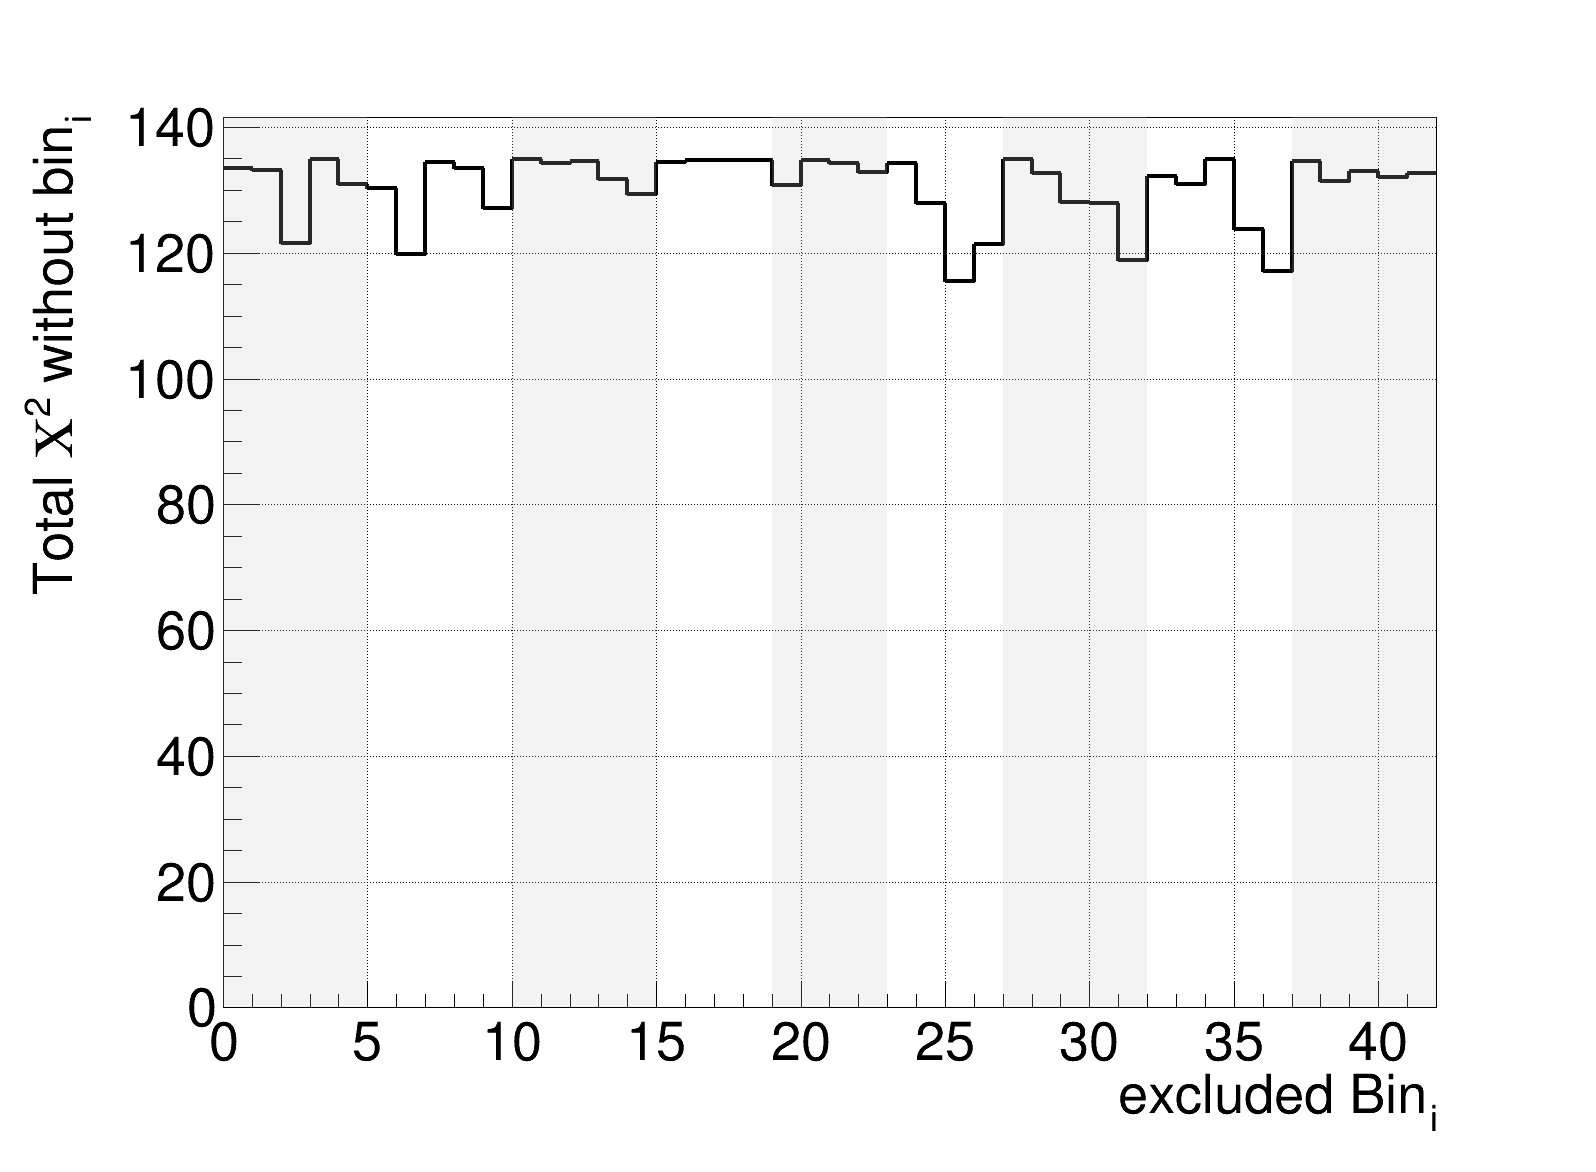

In [24]:
chi2 = my_chi2(h_data_mcc8,h_data_mcc9,h_covariance_tot)
chi2_nMinus1 = chi2_minus1(h_data_mcc8,h_data_mcc9,h_covariance_tot)

print chi2
#print chi2_nMinus1

h_chiM1 = FF.arr2plot(chi2_nMinus1)
h_chiM1.SetMinimum(0)
h_chiM1.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chiM1.GetYaxis().SetTitleOffset(1.3)
h_chiM1.SetXTitle('excluded Bin_{i}')
h_chiM1.Draw()
h_ = FF.histBkg(h_chiM1)
h_.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_chiM1.png")
c1.SaveAs(outputdir_root + "h_chiM1.root")
c1.SaveAs(outputdir_pdf + "h_chiM1.pdf")

In [25]:
h_err_mcc8 = h_data_mcc8.Clone()
for i in range(n_bins):
    h_err_mcc8.SetBinError(i+1, math.sqrt(h_covariance_mcc8.GetBinContent(i+1,i+1)))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/png/h_MCC8_9.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/root/h_MCC8_9.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/pdf/h_MCC8_9.pdf has been created


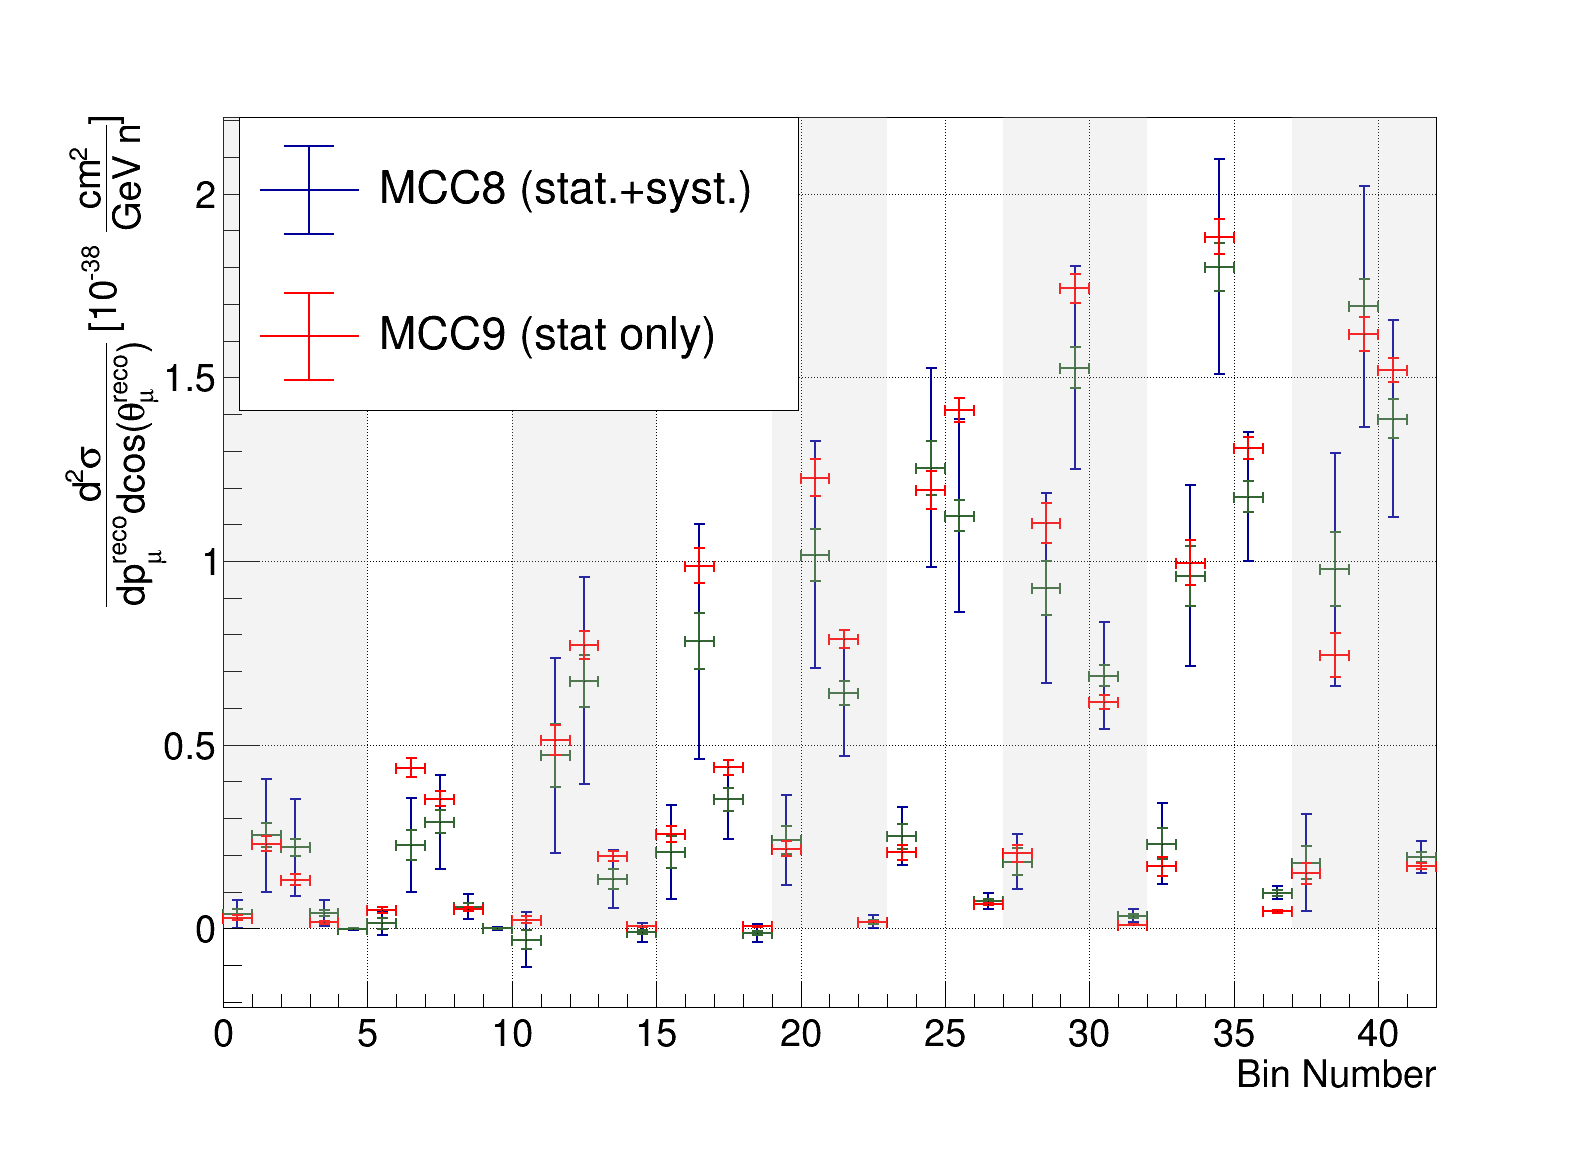

In [26]:
h_err_mcc8.SetLineWidth(2)
h_data_mcc8.SetLineWidth(2)
h_data_mcc9.SetLineWidth(2)
h_err_mcc8.Draw('E1')
h_data_mcc8.SetLineColor(ROOT.kGreen-1)
h_data_mcc8.Draw('E1 same')
h_data_mcc9.SetLineColor(ROOT.kRed)
h_data_mcc9.Draw('E1 same')
h_.Draw('same')


legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
legend.AddEntry(h_err_mcc8,'MCC8 (stat.+syst.)',"lep");
legend.AddEntry(h_data_mcc9,'MCC9 (stat only)',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_MCC8_9.png")
c1.SaveAs(outputdir_root + "h_MCC8_9.root")
c1.SaveAs(outputdir_pdf + "h_MCC8_9.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/png/h_MCC8_9_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/root/h_MCC8_9_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_simple/xsec_MCC8_to_9/pdf/h_MCC8_9_ratio.pdf has been created


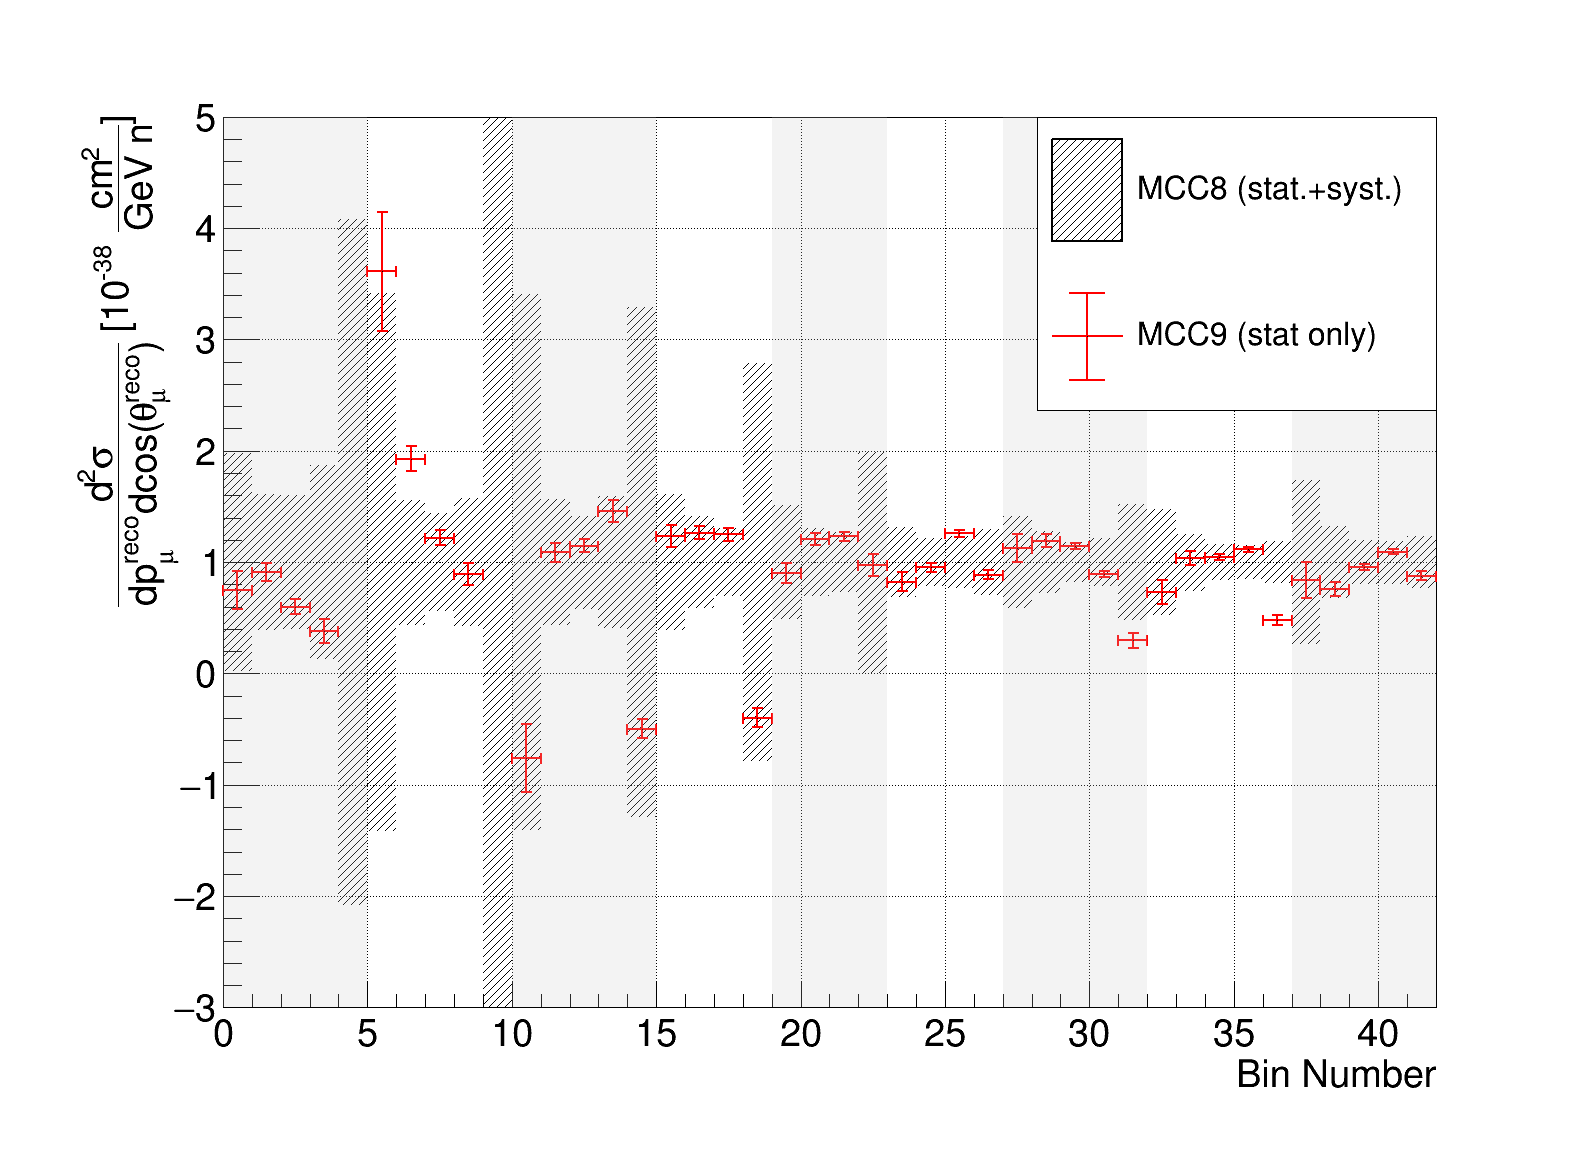

In [27]:
h_err_r = h_err_mcc8.Clone()
h_data_mcc9_r = h_data_mcc9.Clone()

h_tot_noerr = h_err_mcc8.Clone()
for i in range(43):
    h_tot_noerr.SetBinError(i,0)

h_err_r.Divide(h_tot_noerr)
h_data_mcc9_r.Divide(h_tot_noerr)

h_err_r.SetFillColor(ROOT.kBlack)
h_err_r.SetLineColor(ROOT.kBlack)
h_err_r.SetFillStyle(3004)

h_err_r.SetMaximum(5)
h_err_r.SetMinimum(-3)
h_err_r.Draw('E2')
h_data_mcc9_r.SetLineColor(ROOT.kRed)
h_data_mcc9_r.Draw('E1 same')
h_.Draw('same')
h_2 = h_.Clone()
for i in range(43):
    if h_.GetBinContent(i)!=0:
        h_2.SetBinContent(i,-100)
h_2.SetMaximum(10)
h_2.SetMinimum(-100)
h_2.Draw('same')
    
legend = ROOT.TLegend(0.65,0.65,0.9,0.9)
legend.AddEntry(h_err_r,'MCC8 (stat.+syst.)',"f");
legend.AddEntry(h_data_mcc9_r,'MCC9 (stat only)',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_MCC8_9_ratio.png")
c1.SaveAs(outputdir_root + "h_MCC8_9_ratio.root")
c1.SaveAs(outputdir_pdf + "h_MCC8_9_ratio.pdf")